In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# 4 Kinematical signature
Aug 30, 2017

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/KinematicalSignature/'

# pairs of tracks at close proximity

In [3]:
pairsFV, MCsamples = load_pairs_as_samples()
pur_eff,pur_eff_numbers = apply_cuts()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


In [4]:
pur_eff

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
${PID}_A$,93.6%,32.0%,92.5%,10.2%,93.6% (3569),58.3% (2333),23.3% (5261),92.5% (1141)
$l_{\mu}>l_{p}$,74.4%,47.1%,77.2%,15.8%,74.4% (2838),28.7% (1149),9.0% (2034),77.2% (953)
"$|\theta_{1,2}-90^0|<60^0$",68.1%,66.6%,74.3%,23.5%,68.1% (2599),18.4% (736),2.5% (569),74.3% (917)
vertex $\Delta Q$,45.2%,69.1%,61.2%,30.3%,45.2% (1724),10.4% (418),1.6% (352),61.2% (755)
$|\Delta \phi - \pi|<40^{0}$,29.5%,76.8%,53.6%,45.1%,29.5% (1126),3.3% (134),0.9% (207),53.6% (662)
$\theta_{pq}<25$,22.3%,90.6%,45.6%,60.0%,22.3% (850),1.5% (62),0.1% (26),45.6% (563)
$p_{t}<0.35$,24.6%,86.1%,48.1%,54.4%,24.6% (939),1.8% (73),0.4% (79),48.1% (594)
$p_{t}<0.15$,12.4%,94.4%,27.5%,67.5%,12.4% (474),0.4% (18),0.0% (10),27.5% (339)


## 4.I The reconstructed momentum of the muon and the proton candidates

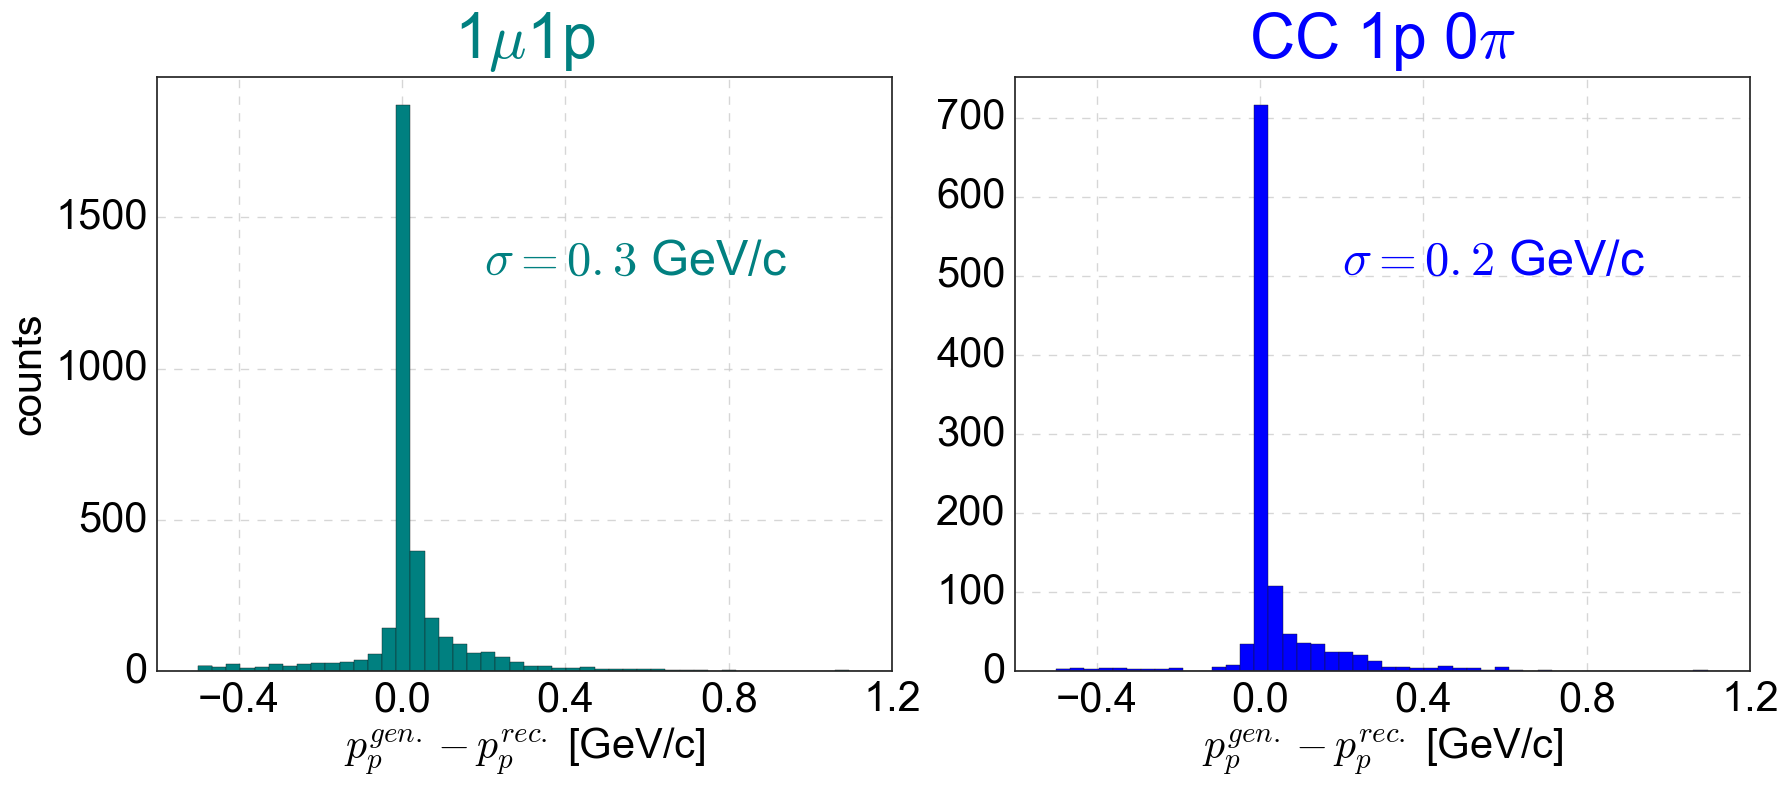

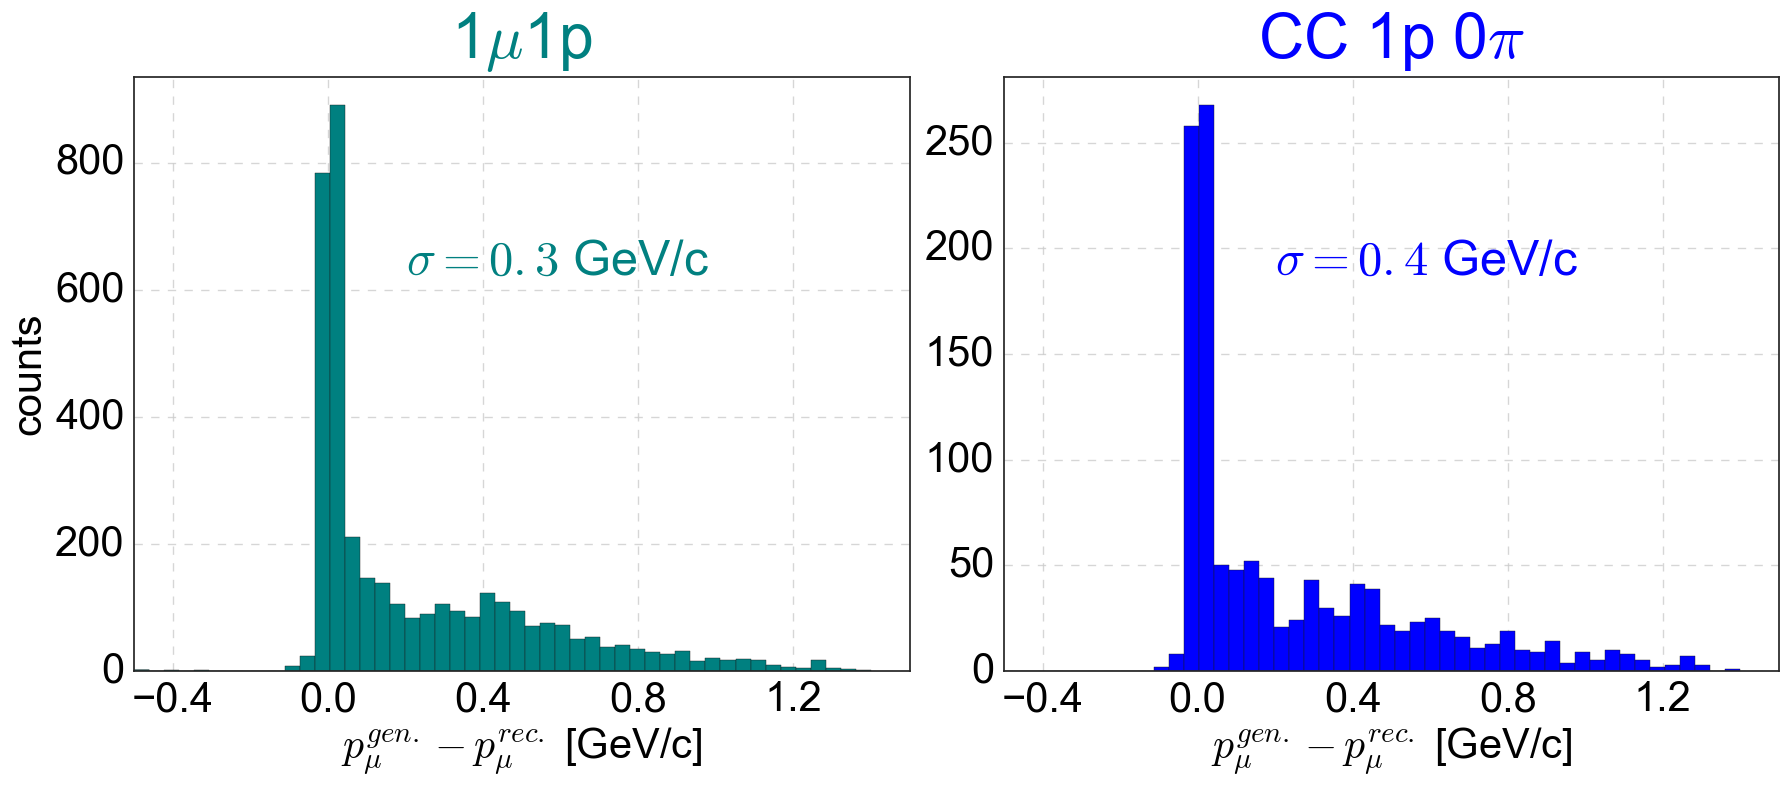

In [7]:
for particle,p_name,xmax in zip(['p','mu'],['p','\\mu'],[1.2,1.4]):
    fig=plt.figure(figsize=(18,8))
    for i,index in enumerate([0,3]):
        pair_type = pair_types[index];label = labels[index]; cmap = cmaps[index]; color = colors[index]
        sample = reduced_MCsamples['no cut'][pair_type]    
        ax = fig.add_subplot(1,2,i+1)
        ax.set_title(label,fontsize=45,y=1.02,color=color)
        delta = (sample['truth_P'+particle] - sample['reco_P'+particle])
        h,bins,_=ax.hist(delta,bins=np.linspace(-0.5,xmax,50),color=color);
        set_axes(ax,'$p_{'+p_name+'}^{gen.}-p_{'+p_name+'}^{rec.}$ [GeV/c]' , 'counts' if i==0 else ''
                 , fontsize=30,do_add_grid=True
                 ,xticks=[-0.4,0,0.4,0.8,1.2])
        small_sample = sample[np.abs(sample['truth_P'+particle] - sample['reco_P'+particle])<2]
        delta_small_sample = small_sample['truth_P'+particle] - small_sample['reco_P'+particle]
        sigma = np.std(delta_small_sample)
        plt.text(0.2,0.7*np.max(h),'$\\sigma=%.1f$'%sigma+' GeV/c',color=color,fontsize=35)
        ax.set_ylim(0,1.05*np.max(h))
    plt.tight_layout()
    fig.savefig(figures_path+'P'+particle+'_gen_reco.pdf')

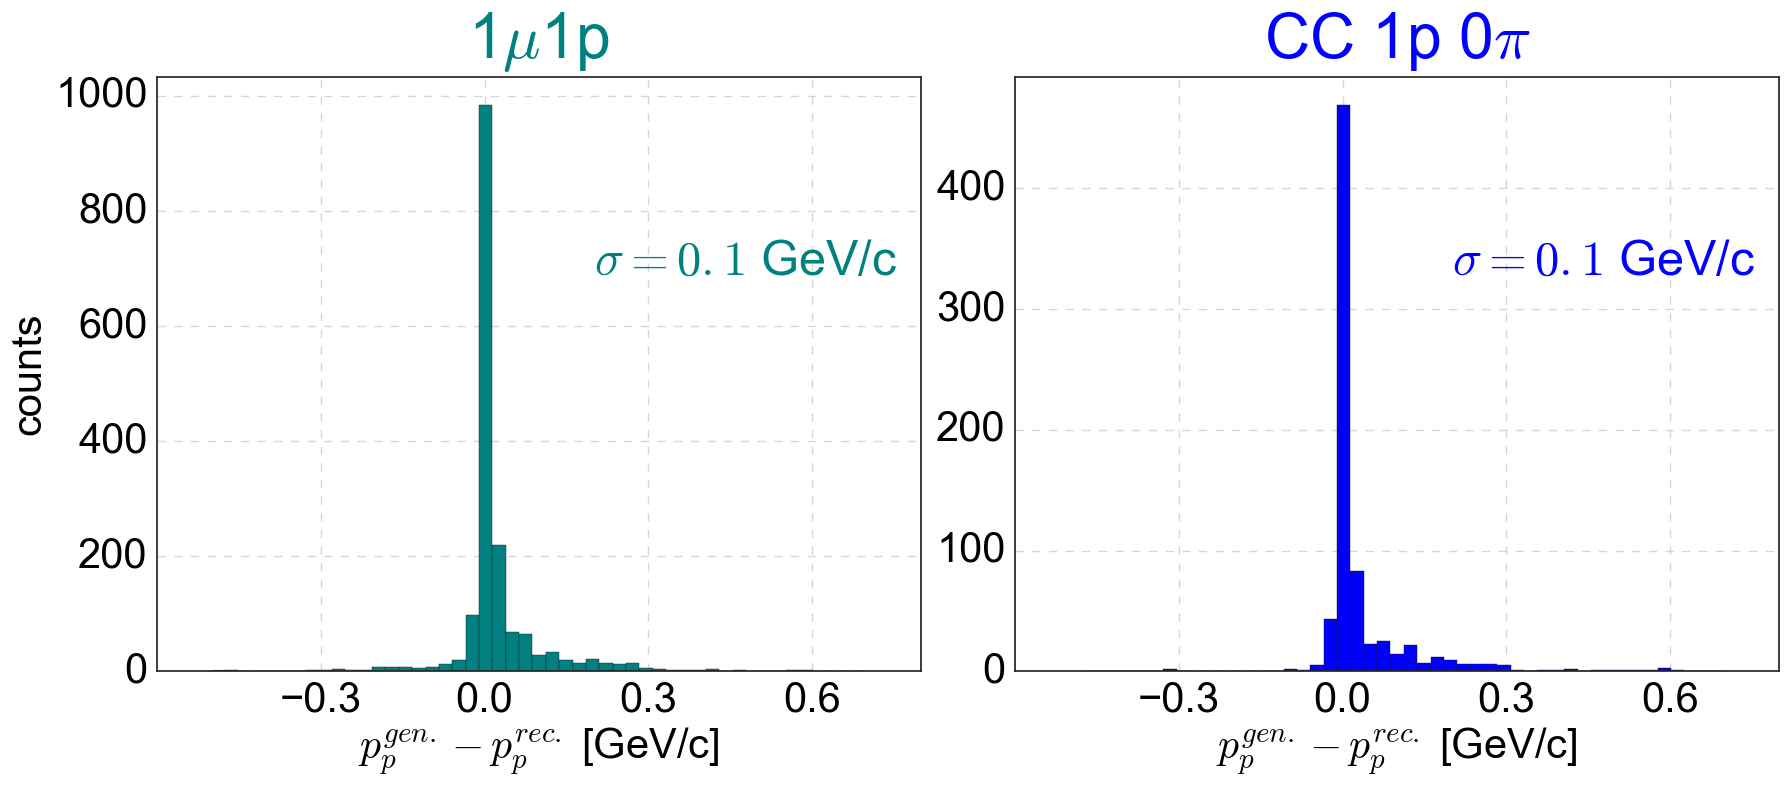

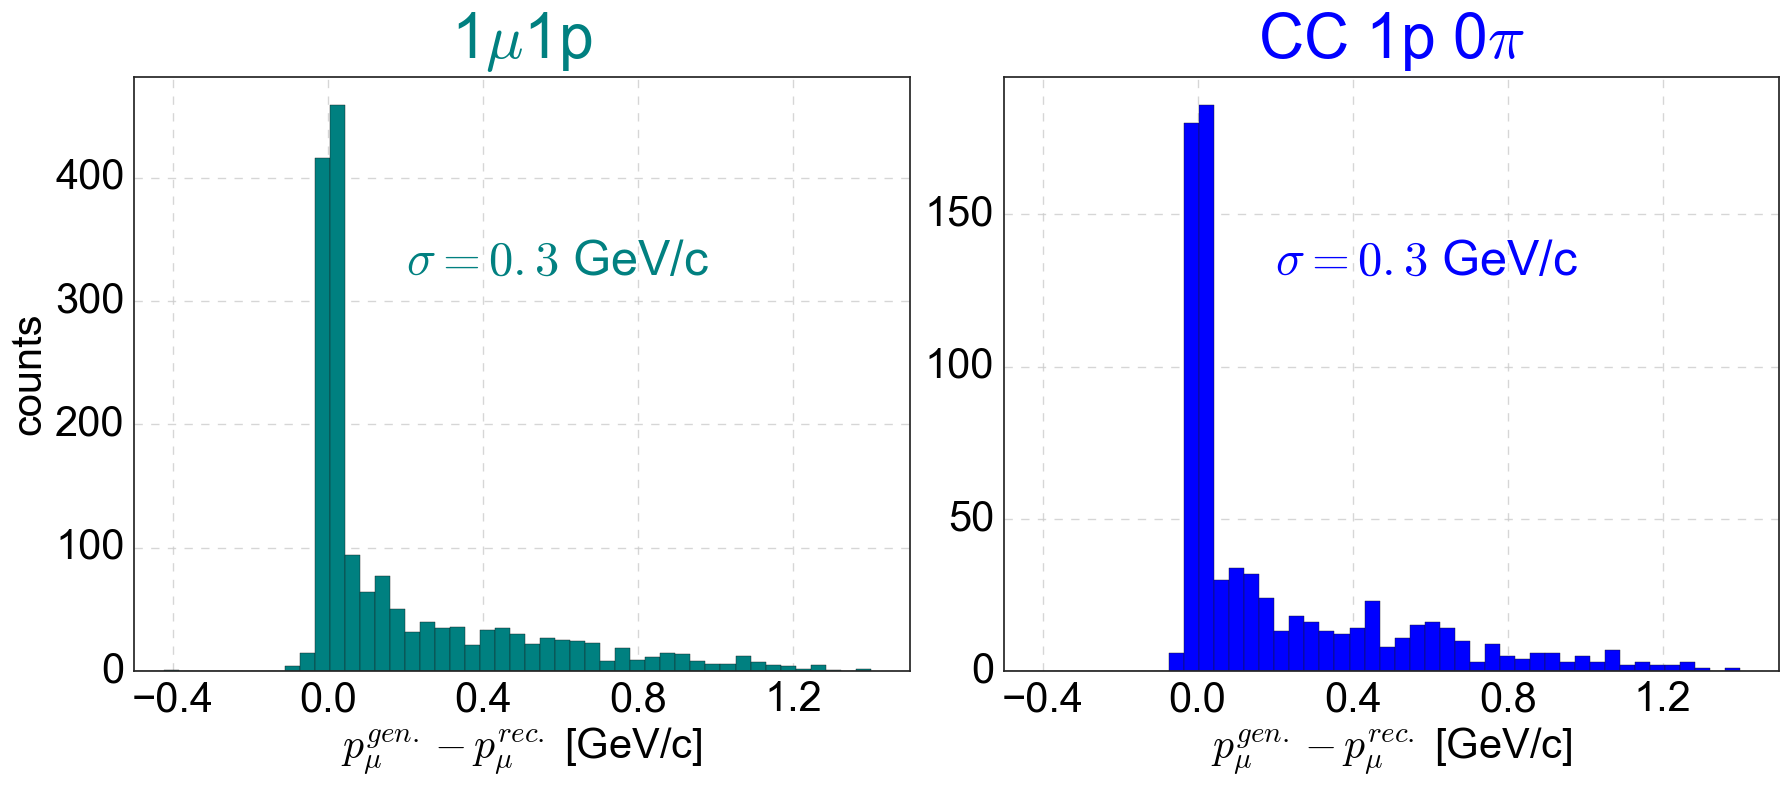

In [11]:
for particle,p_name,xmax,xticks in zip(['p','mu'],['p','\\mu'],[0.7,1.4]
                                       ,[[-0.3,0,0.3,0.6],[-0.4,0,0.4,0.8,1.2]]):
    fig=plt.figure(figsize=(18,8))
    for i,index in enumerate([0,3]):
        pair_type = pair_types[index];label = labels[index]; cmap = cmaps[index]; color = colors[index]
        sample = reduced_MCsamples['vertex $\Delta Q$'][pair_type]    
        ax = fig.add_subplot(1,2,i+1)
        ax.set_title(label,fontsize=45,y=1.02,color=color)
        delta = (sample['truth_P'+particle] - sample['reco_P'+particle])
        h,bins,_=ax.hist(delta,bins=np.linspace(-0.5,xmax,50),color=color);
        set_axes(ax,'$p_{'+p_name+'}^{gen.}-p_{'+p_name+'}^{rec.}$ [GeV/c]' , 'counts' if i==0 else ''
                 , fontsize=30,do_add_grid=True
                 ,xticks=xticks
                )
        small_sample = sample[np.abs(sample['truth_P'+particle] - sample['reco_P'+particle])<2]
        delta_small_sample = small_sample['truth_P'+particle] - small_sample['reco_P'+particle]
        sigma = np.std(delta_small_sample)
        plt.text(0.2,0.7*np.max(h),'$\\sigma=%.1f$'%sigma+' GeV/c',color=color,fontsize=35)
        ax.set_ylim(0,1.05*np.max(h))
    plt.tight_layout()
    fig.savefig(figures_path+'P'+particle+'_gen_reco_after_detection_cuts.pdf')

### 4.II Coplanarity - ∆φ between tracks

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

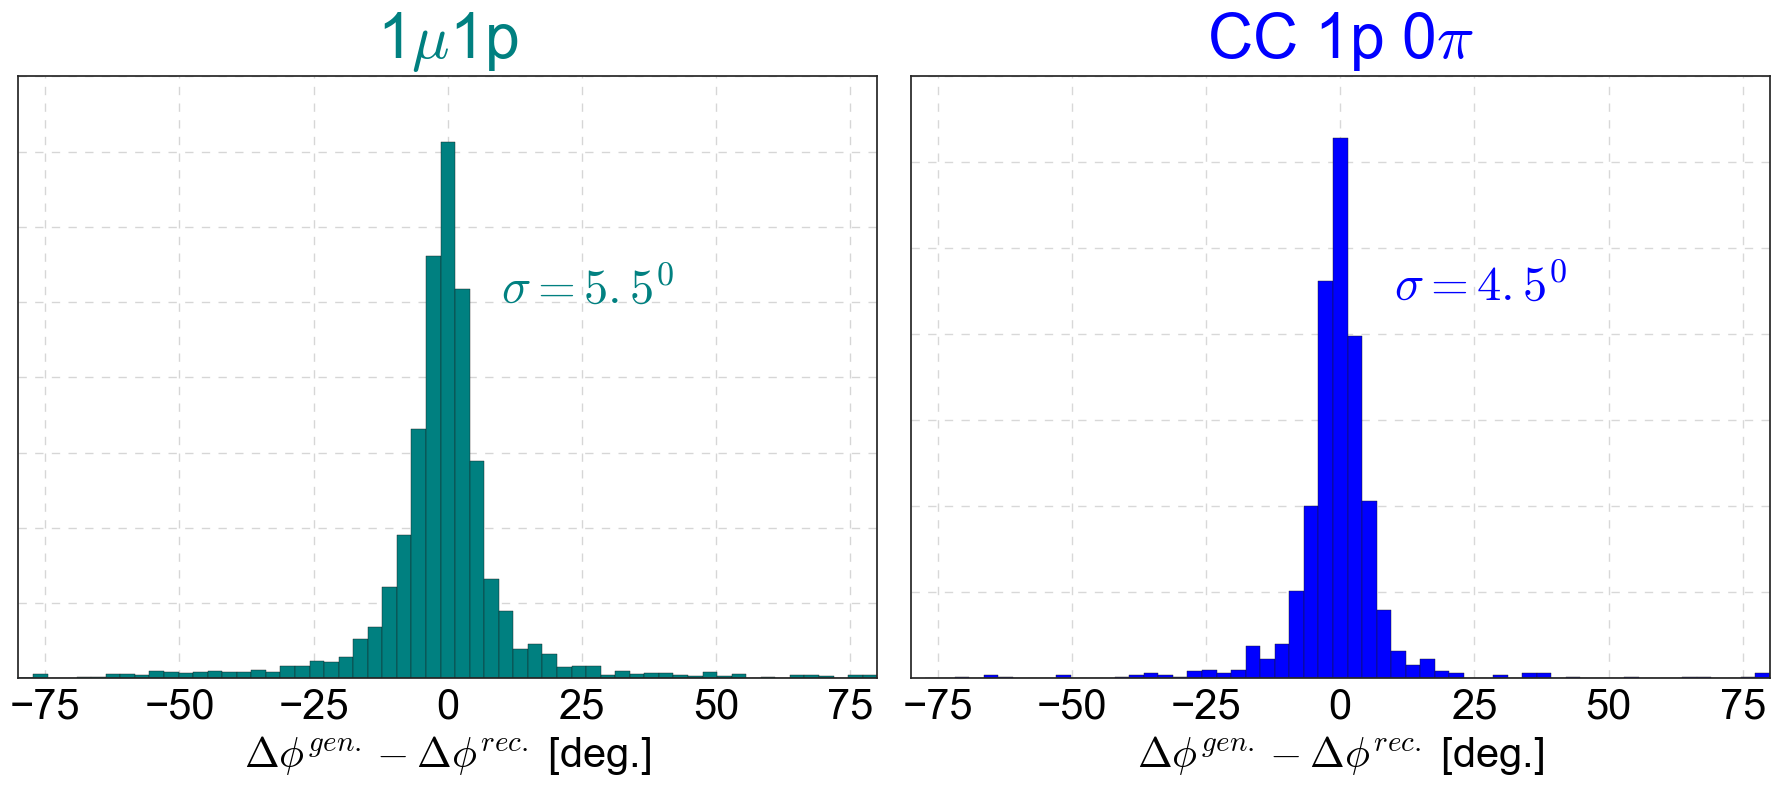

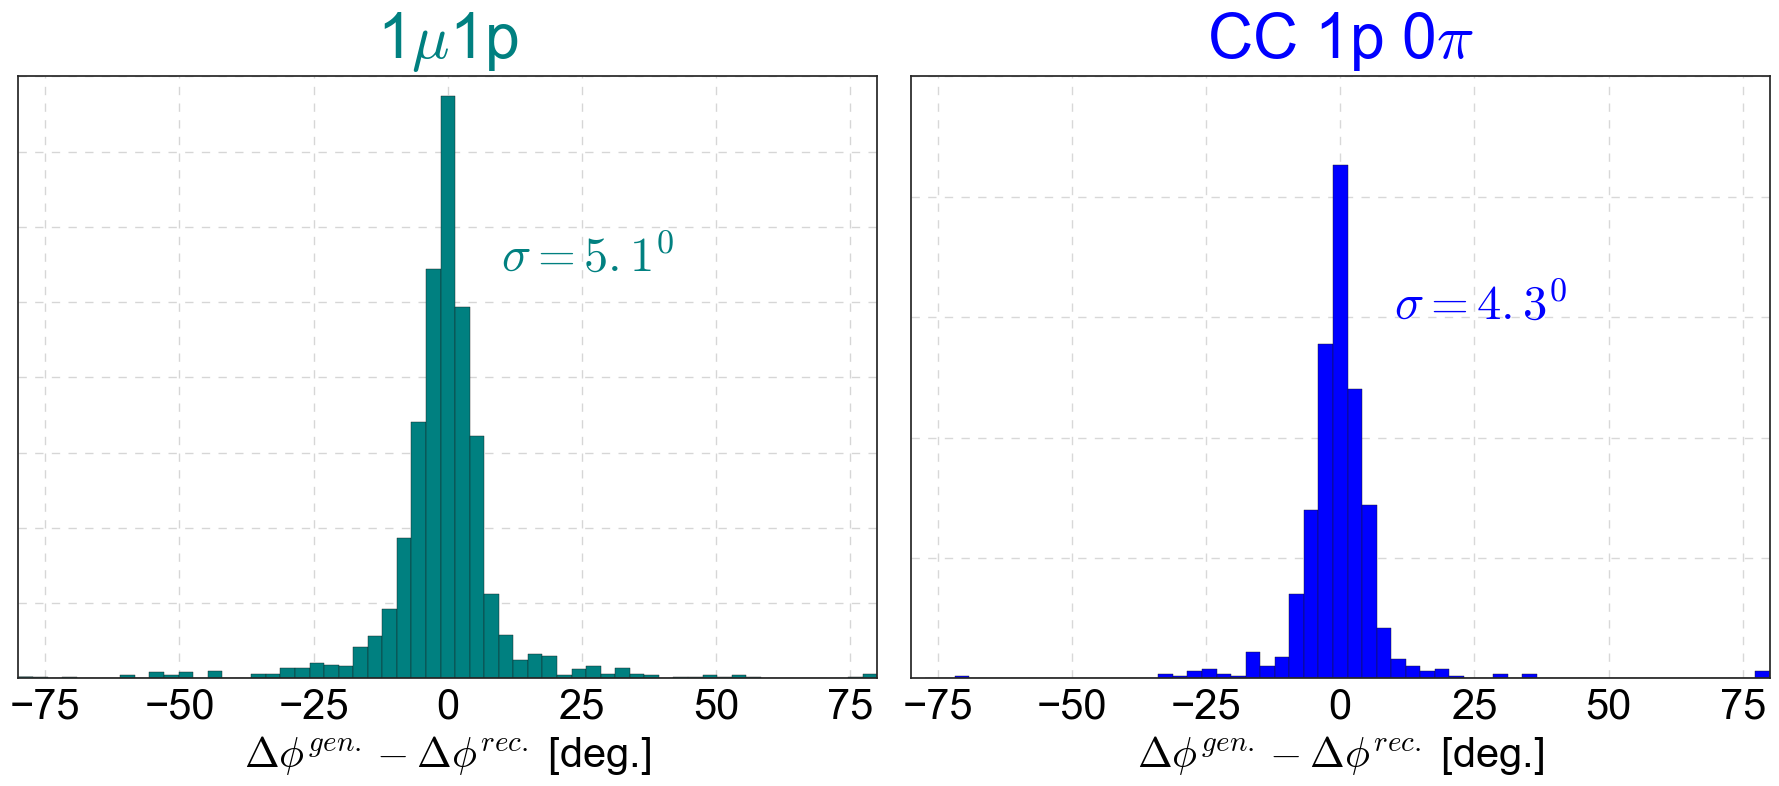

In [19]:
fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['no cut'][pair_type]  
    sample['truth_Pmu_phi'] = np.arctan2(sample['truth_Pmu_y'],sample['truth_Pmu_x'])
    sample['truth_Pp_phi'] = np.arctan2(sample['truth_Pp_y'],sample['truth_Pp_x'])
    sample['truth_delta_phi'] = 180/np.pi * np.abs( sample['truth_Pmu_phi'] - sample['truth_Pp_phi'])
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_delta_phi']-sample['delta_phi'],bins=np.linspace(-80,80,60),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\Delta \\phi^{gen.}-\\Delta \\phi^{rec.}$ [deg.]' , '', fontsize=30,do_add_grid=True
             ,xticks=[-75,-50,-25,0,25,50,75])
    small_sample = sample[np.abs(sample['truth_delta_phi']-sample['delta_phi'])<15]
    sigma = np.std(small_sample['truth_delta_phi']-small_sample['delta_phi'])
    plt.text(10,0.7*np.max(h),'$\\sigma=%.1f$'%sigma+'$^0$',color=color,fontsize=35)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'delta_phi_gen_reco.pdf')

fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['vertex $\Delta Q$'][pair_type]    
    sample['truth_Pmu_phi'] = np.arctan2(sample['truth_Pmu_y'],sample['truth_Pmu_x'])
    sample['truth_Pp_phi'] = np.arctan2(sample['truth_Pp_y'],sample['truth_Pp_x'])
    sample['truth_delta_phi'] = 180/np.pi * np.abs( sample['truth_Pmu_phi'] - sample['truth_Pp_phi'])
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_delta_phi']-sample['delta_phi'],bins=np.linspace(-80,80,60),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\Delta \\phi^{gen.}-\\Delta \\phi^{rec.}$ [deg.]' , '', fontsize=30,do_add_grid=True
             ,xticks=[-75,-50,-25,0,25,50,75])
    small_sample = sample[np.abs(sample['truth_delta_phi']-sample['delta_phi'])<15]
    sigma = np.std(small_sample['truth_delta_phi']-small_sample['delta_phi'])
    plt.text(10,0.7*np.max(h),'$\\sigma=%.1f$'%sigma+'$^0$',color=color,fontsize=35)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'delta_phi_gen_reco_after_cut_VertexActivity.pdf')

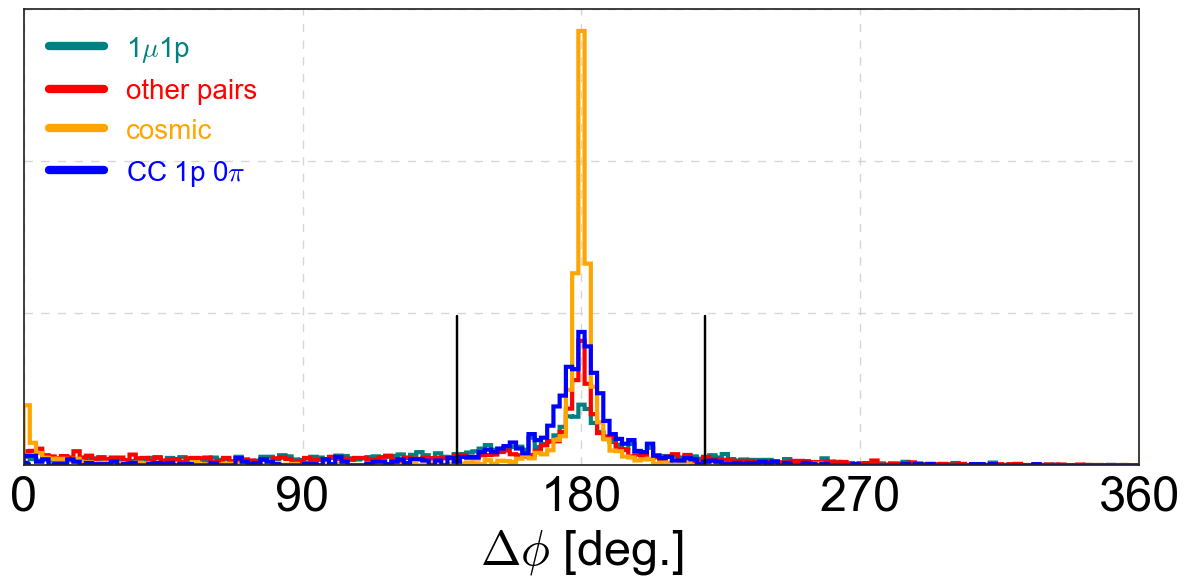

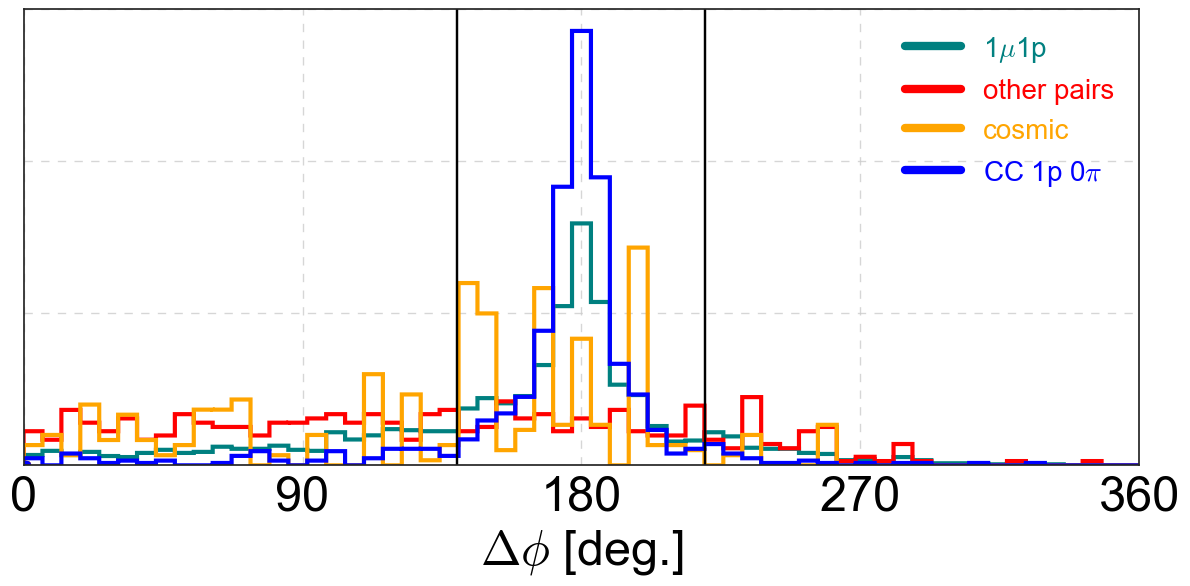

In [15]:
plot_feature_pairs(cut_name='no cut',var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',do_add_legend=True,legend_loc='upper left'
                              ,bins=np.linspace(0,360,180),figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([140,140],[0,0.05],'-',color='black')
plt.plot([220,220],[0,0.05],'-',color='black')
plt.savefig(figures_path+'DeltaPhi.pdf')

# after cut 4
plot_feature_pairs(cut_name='vertex $\Delta Q$',var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',do_add_legend=True,legend_loc='upper right'
                              ,bins=np.linspace(0,360,60),figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([140,140],[0,0.05],'-',color='black')
plt.plot([220,220],[0,0.05],'-',color='black')
plt.savefig(figures_path+'DeltaPhi_after_cut_VertexActivity.pdf')

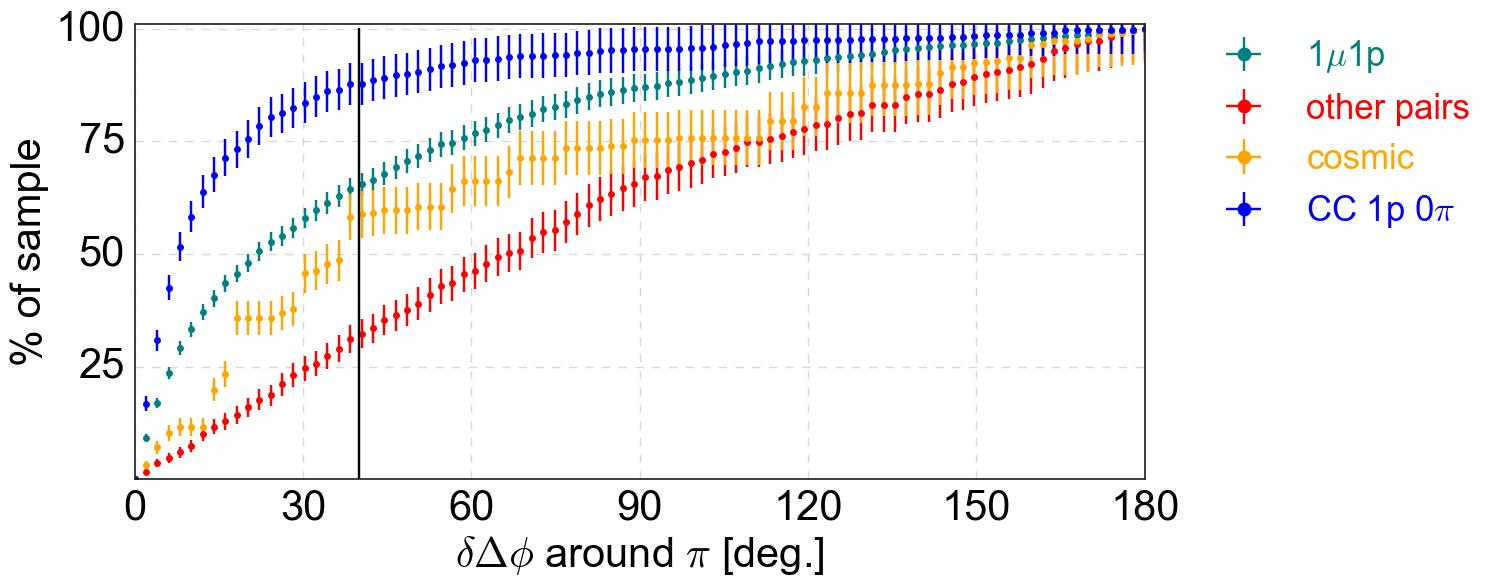

In [16]:
ax,leg=plot_cut_samples(reduced_cut_name='vertex $\Delta Q$',do_add_legend=True,
                     cut_var ='delta_phi',cut_type= 'symmetric',x_label = '$\\delta \\Delta \\phi$ around $\\pi$ [deg.]',ticks_color='black',
                     xcenter=180, xmin=0., xmax=180 , Nbins=90,fontsize=30,figsize=(12,6))
plt.plot([40,40],[0,100],'-',color='black')
plt.savefig(figures_path+'DeltaPhi_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

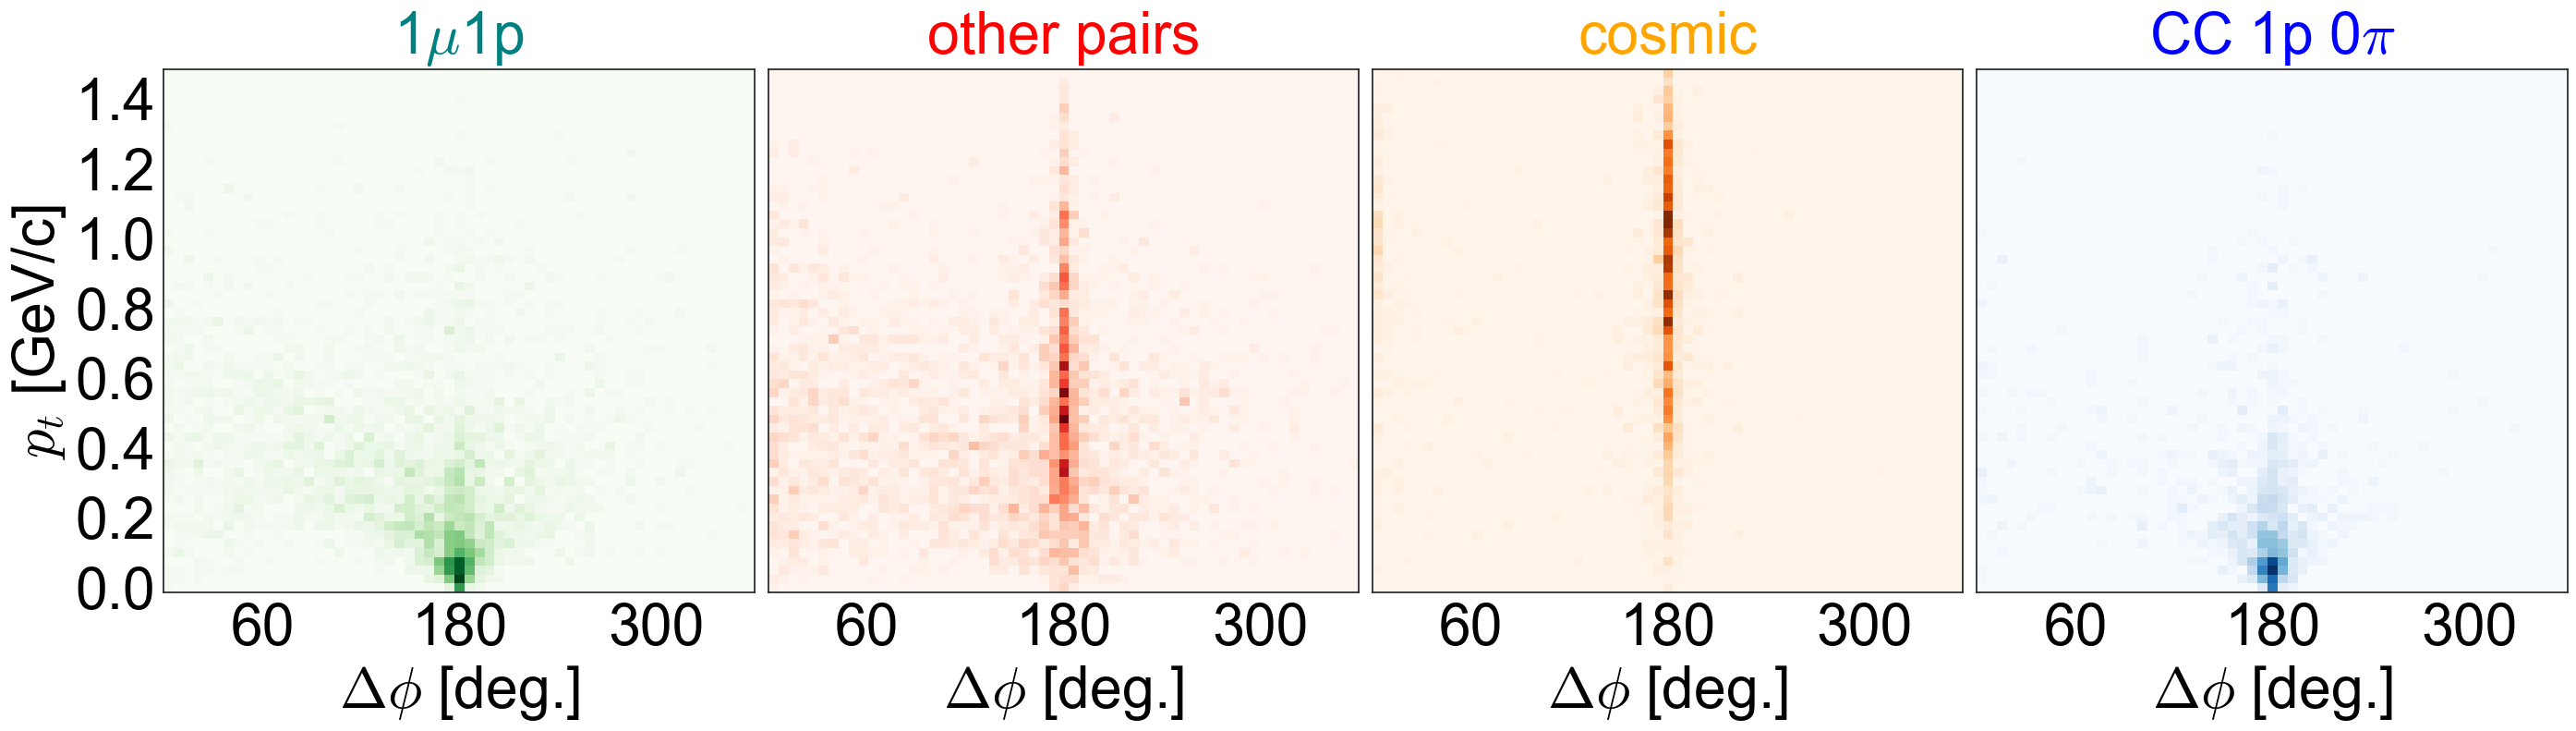

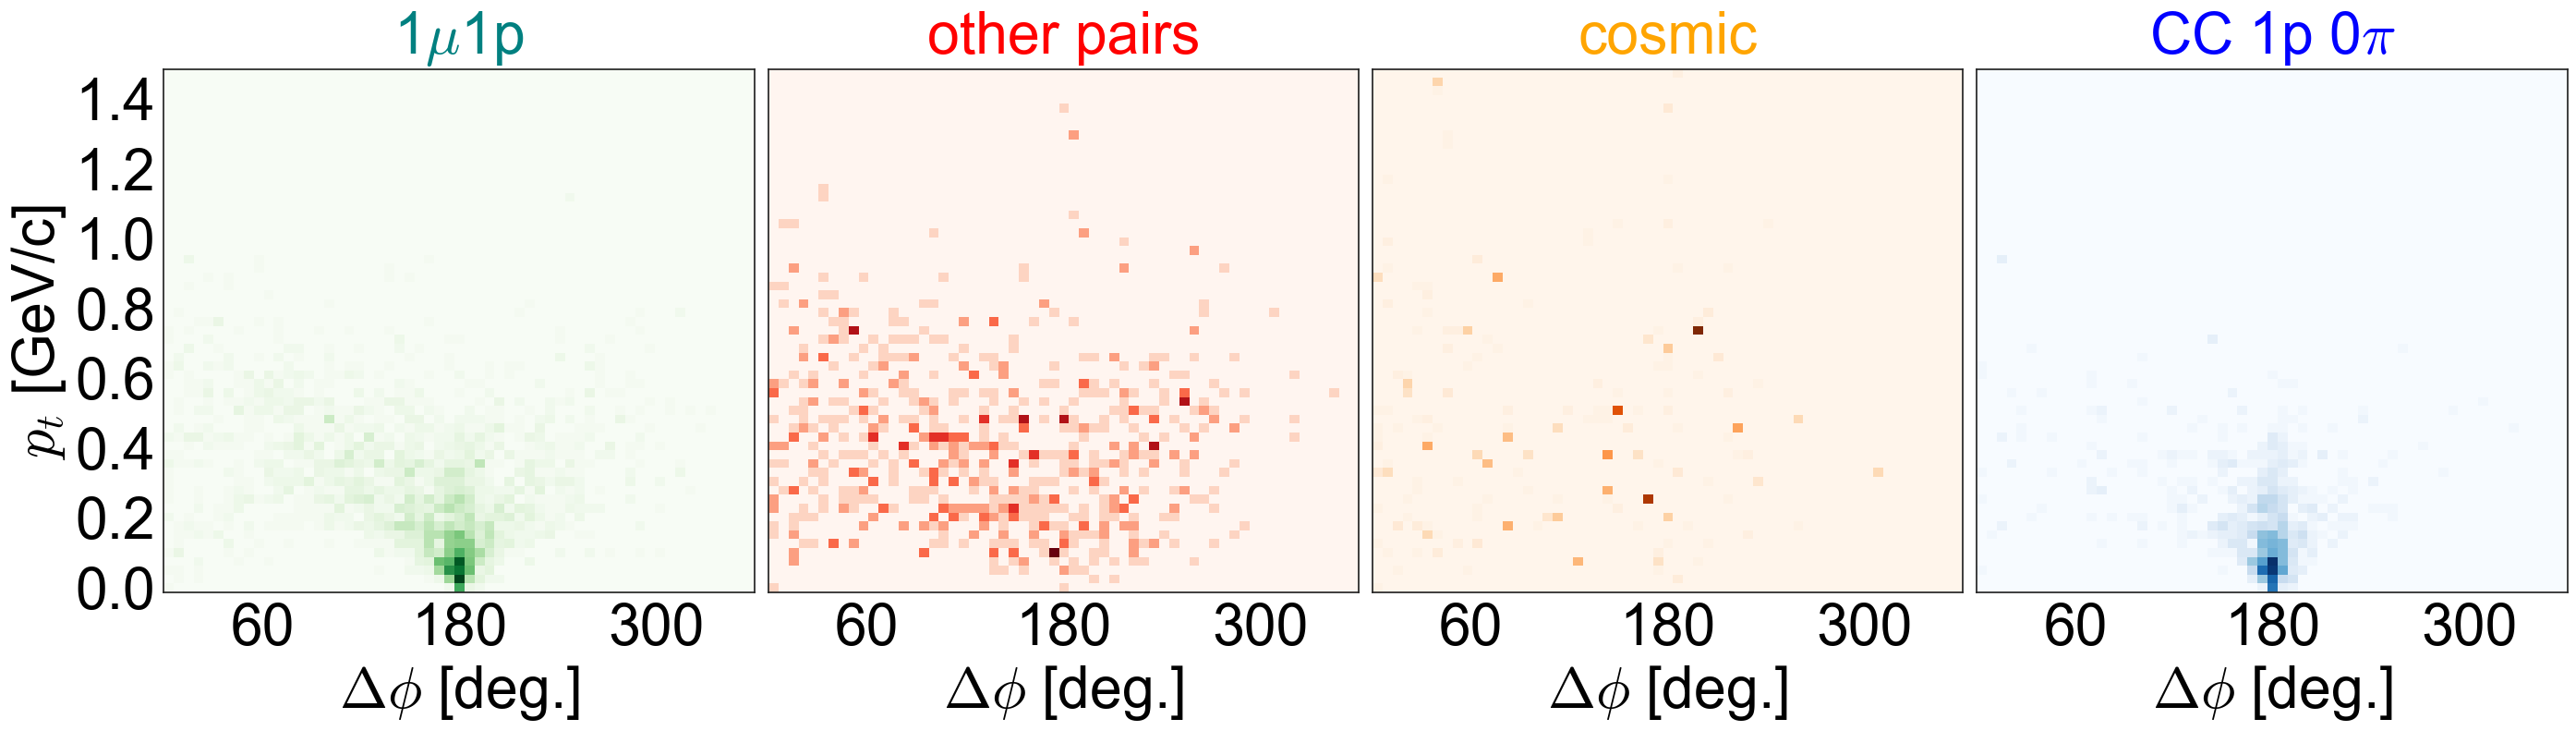

In [18]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,360,60),np.linspace(0,1.5,60))
x_label,y_label='$\\Delta \\phi$ [deg.]','$p_{t}$ [GeV/c]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,labels,cmaps,colors)):
    sample = reduced_MCsamples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['delta_phi'], 
                 sample['reco_Pt'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([60,180,300])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'DeltaPhi_vs_Pt.pdf')


fig = plt.figure(figsize=(28,8))
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,labels,cmaps,colors)):
    sample = reduced_MCsamples['$|\theta_{1,2}-90^0|<60^0$'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['delta_phi'], 
                 sample['reco_Pt'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([60,180,300])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'DeltaPhi_vs_Pt_after_cut_VertexActivity.pdf')

## Appendix A Reconstructed $\theta (p,q)$

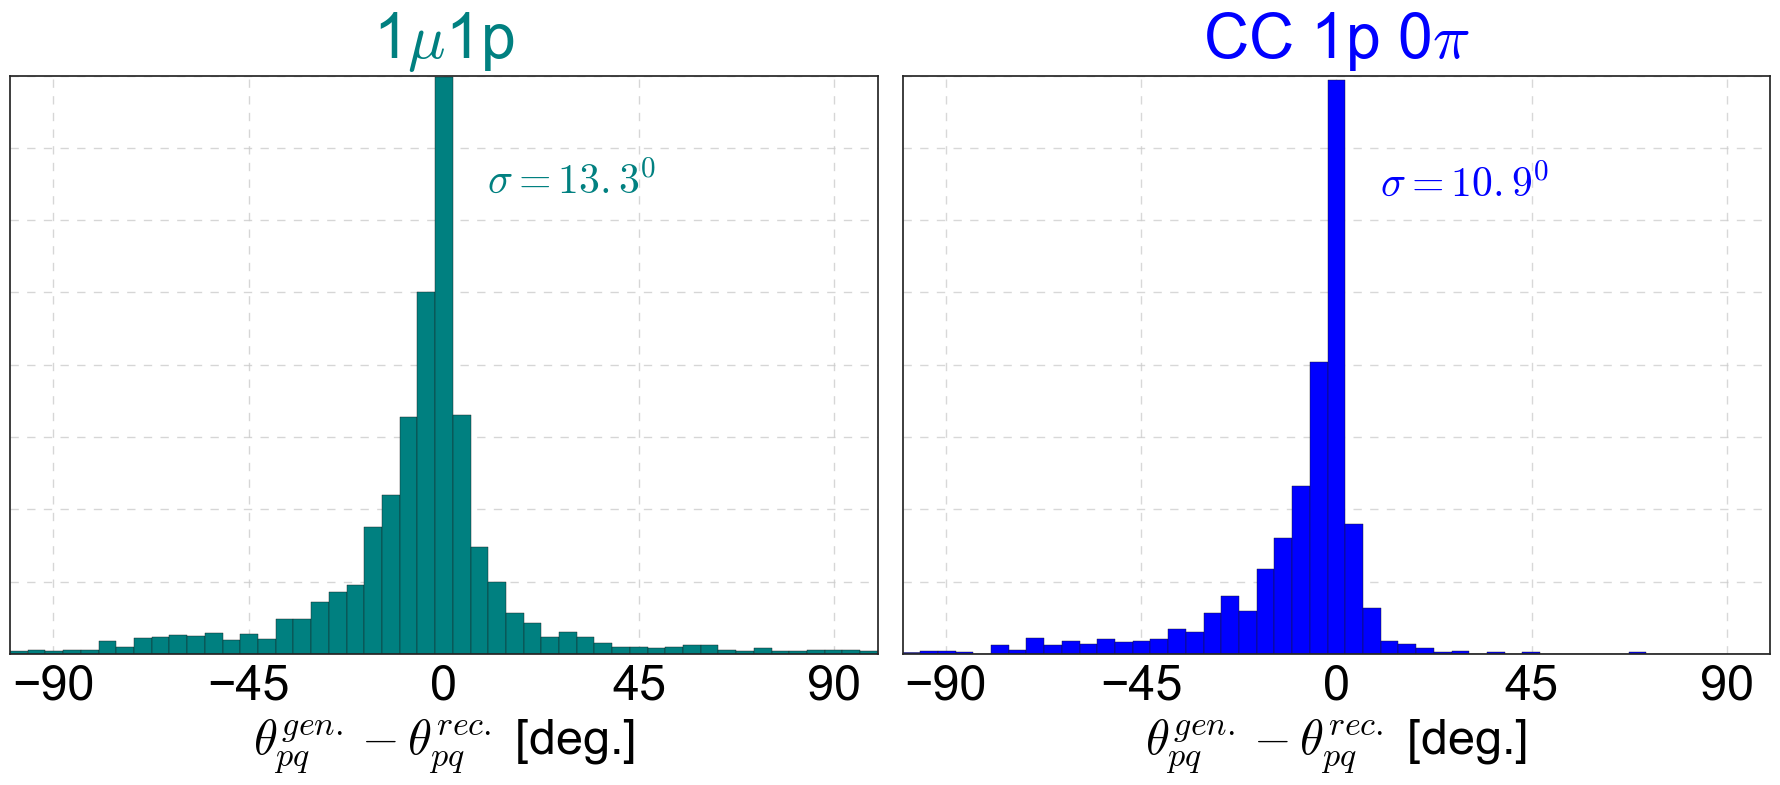

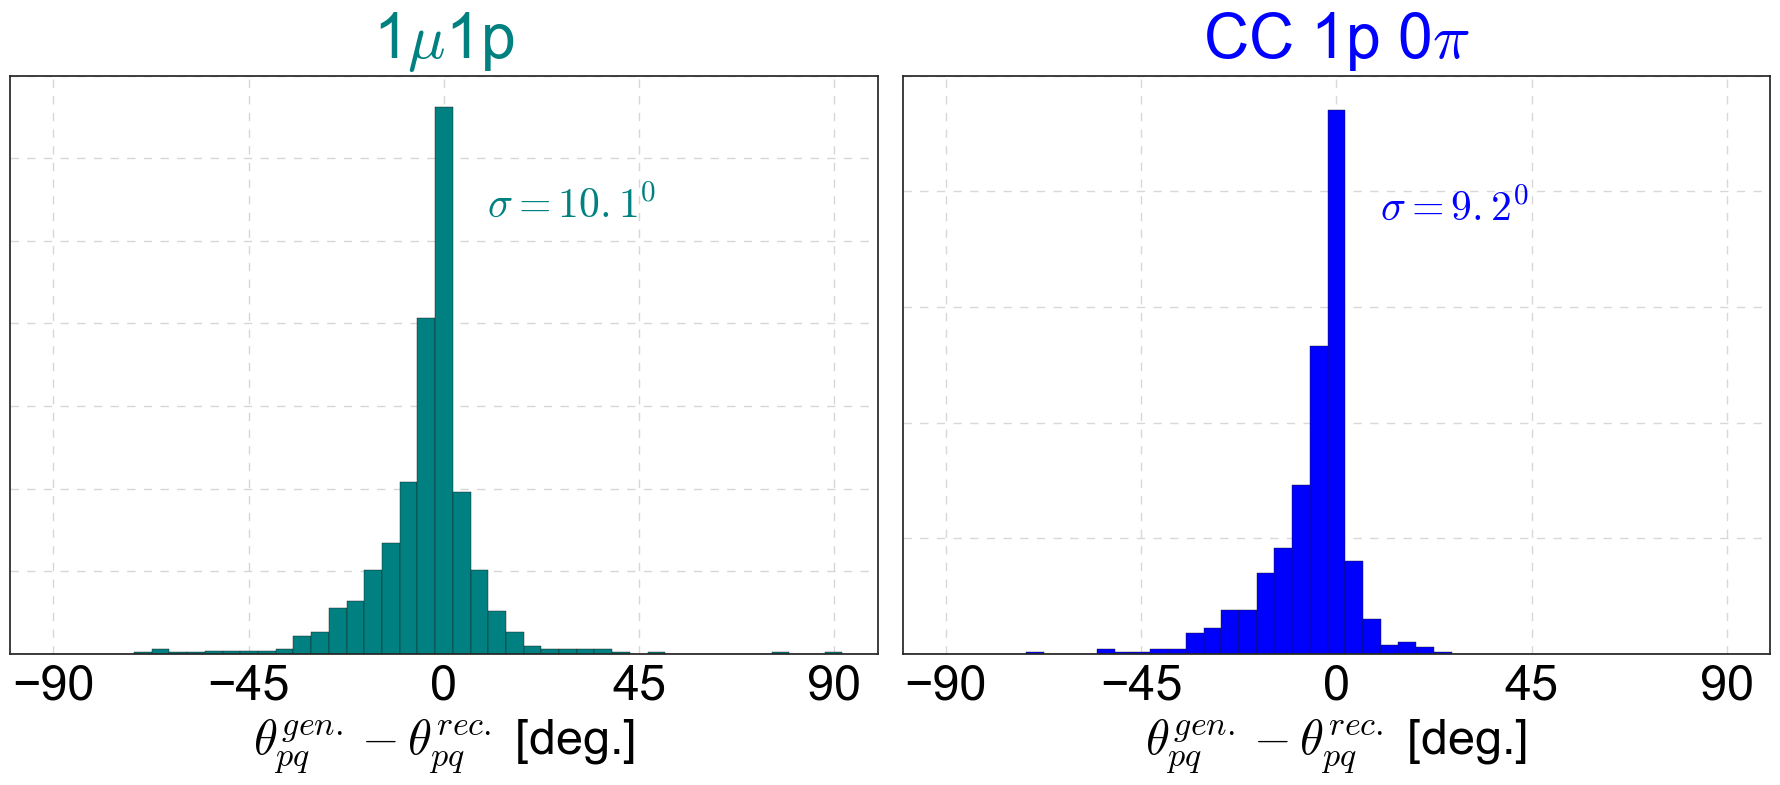

In [21]:
fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_theta_pq']-sample['reco_theta_pq'],bins=np.linspace(-100,100,50),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq}$ [deg.]' , '', fontsize=35,do_add_grid=True
             ,xticks=[-90,-45,0,45,90])
    small_sample = sample[np.abs(sample['truth_theta_pq']-sample['reco_theta_pq'])<45]
    sigma = np.std(small_sample['truth_theta_pq']-small_sample['reco_theta_pq'])
    plt.text(10,0.8*np.max(h),'$\\sigma=%.1f$'%sigma+'$^0$',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
plt.savefig(figures_path+'theta_pq_gen_reco.pdf')

fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['$|\Delta \phi - \pi|<40^{0}$'][pair_type]
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_theta_pq']-sample['reco_theta_pq'],bins=np.linspace(-100,100,50),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq}$ [deg.]' , '', fontsize=35,do_add_grid=True
             ,xticks=[-90,-45,0,45,90])
    small_sample = sample[np.abs(sample['truth_theta_pq']-sample['reco_theta_pq'])<45]
    sigma = np.std(small_sample['truth_theta_pq']-small_sample['reco_theta_pq'])
    plt.text(10,0.8*np.max(h),'$\\sigma=%.1f$'%sigma+'$^0$',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
plt.savefig(figures_path+'theta_pq_gen_reco_after_cut_DeltaPhi.pdf')

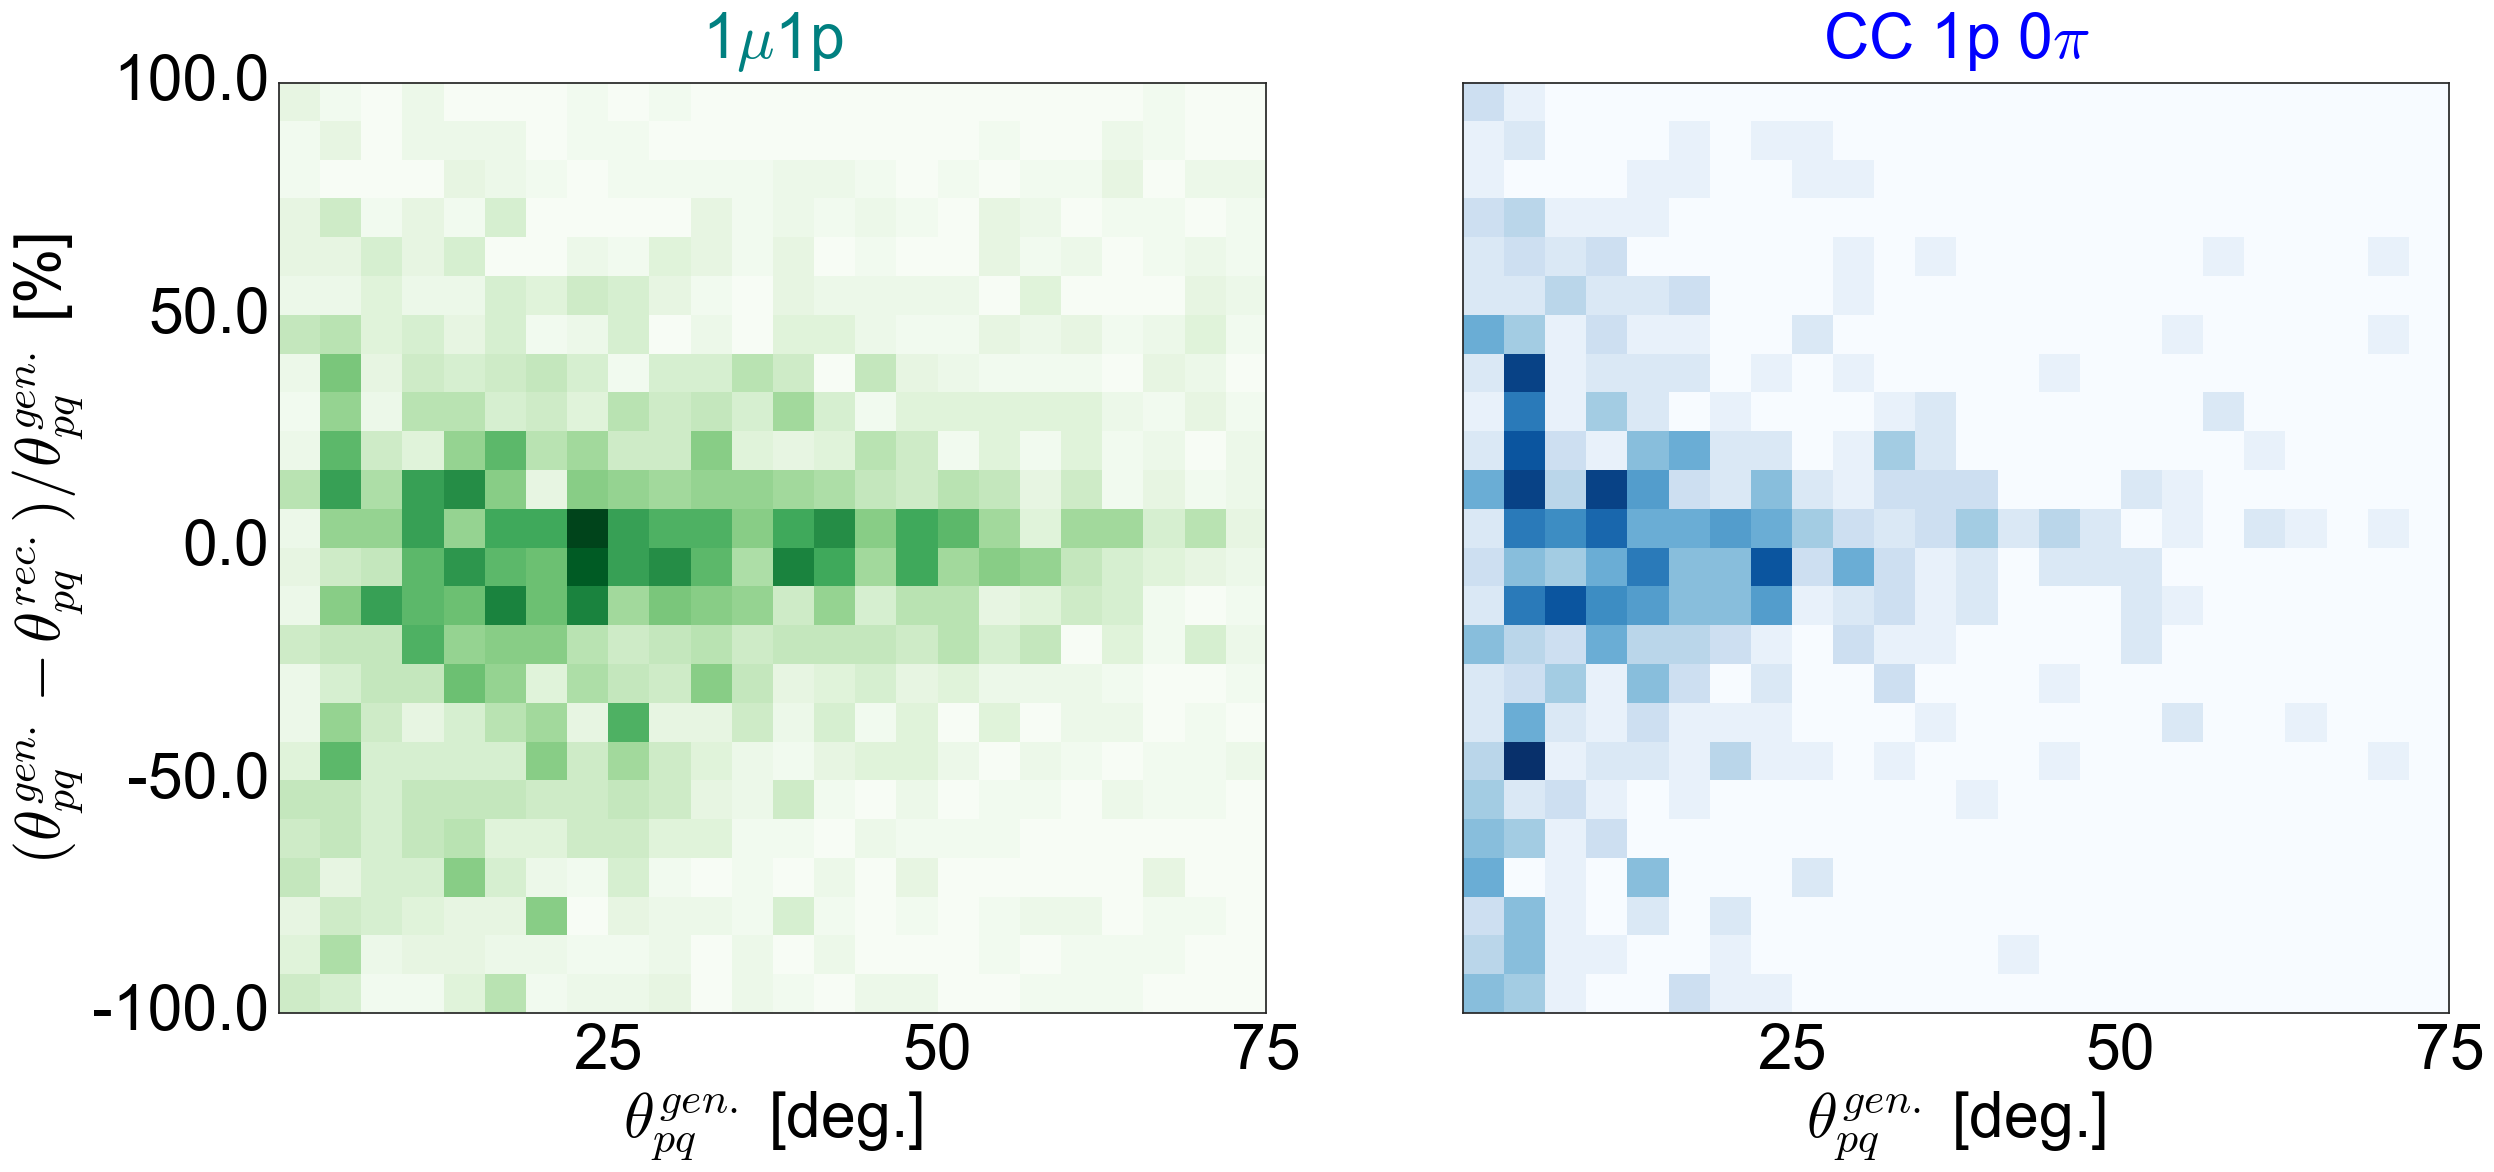

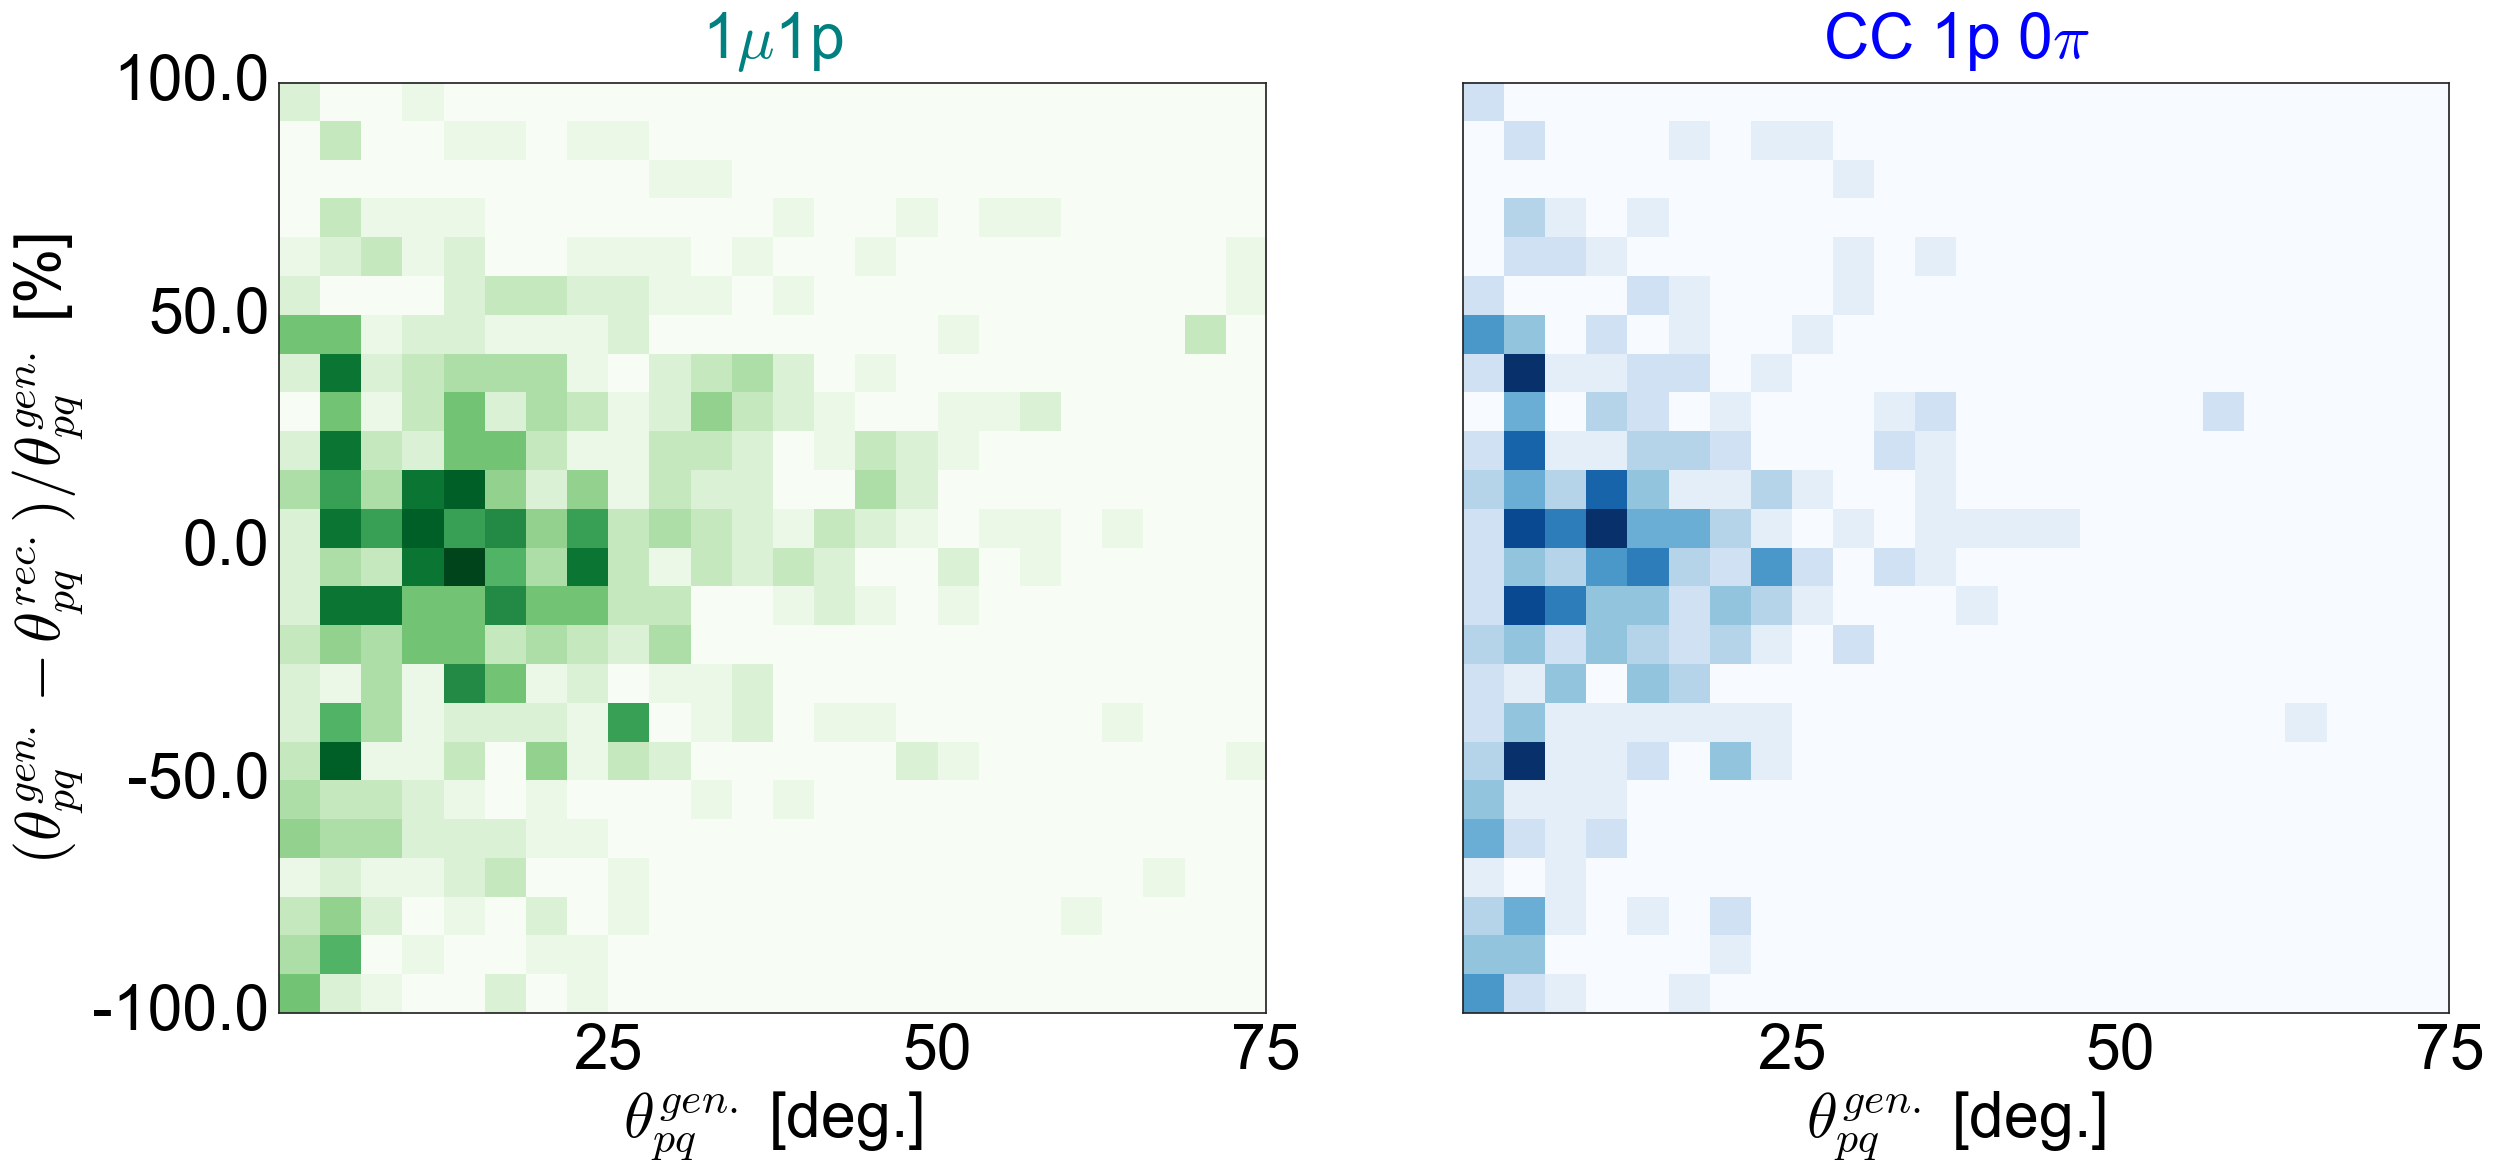

In [22]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,75,25),np.linspace(-100,100,25))
    
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_theta_pq'], 
                 100.*(sample['truth_theta_pq']-sample['reco_theta_pq'])/sample['truth_theta_pq'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$\\theta^{gen.}_{pq}$ [deg.]', y_label='$(\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq})/\\theta^{gen.}_{pq}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
fig.savefig(figures_path+'theta_pq_reconstruction.pdf')

fig = plt.figure(figsize=(28,12))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['$|\Delta \phi - \pi|<40^{0}$'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_theta_pq'], 
                 100.*(sample['truth_theta_pq']-sample['reco_theta_pq'])/sample['truth_theta_pq'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$\\theta^{gen.}_{pq}$ [deg.]', y_label='$(\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq})/\\theta^{gen.}_{pq}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
fig.savefig(figures_path+'theta_pq_reconstruction_after_cut_DeltaPhi.pdf')

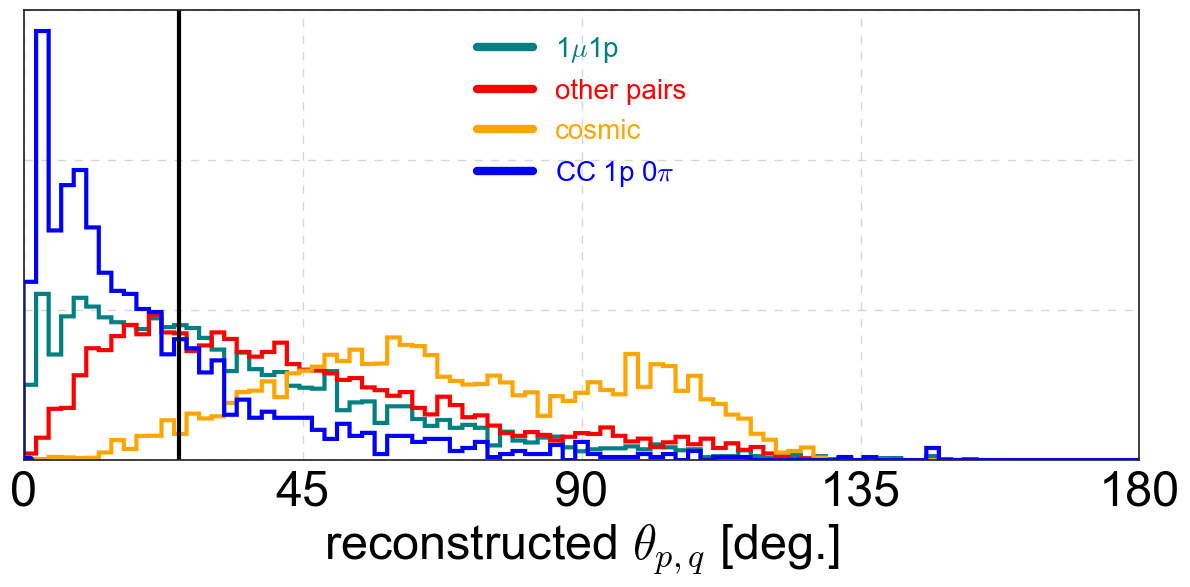

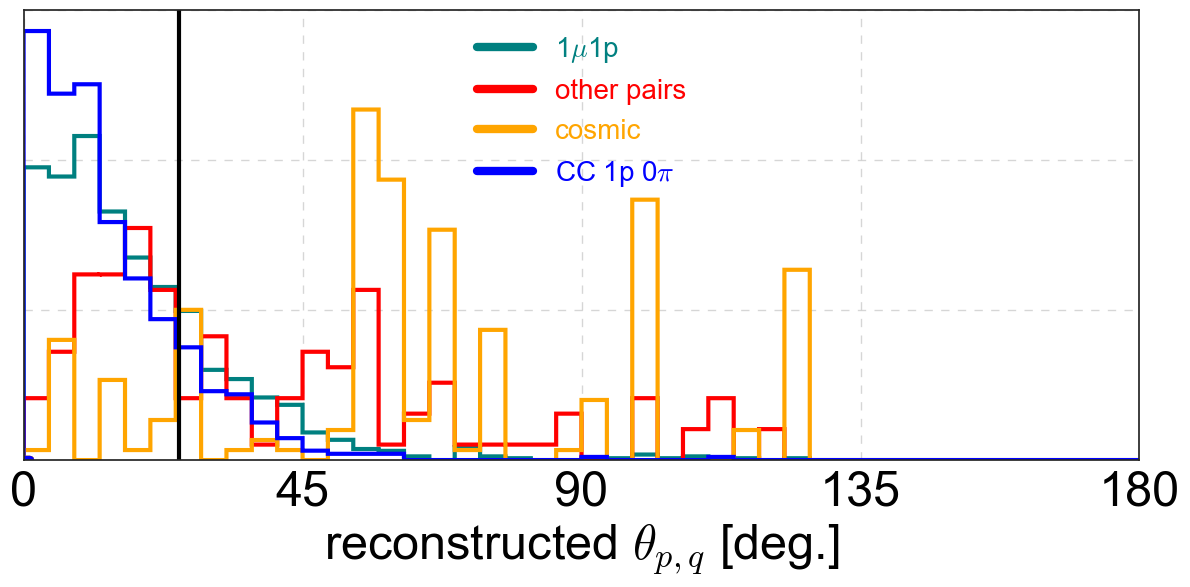

In [23]:
ax=plot_feature_pairs(cut_name='no cut',var='reco_theta_pq',x_label='reconstructed $\\theta_{p,q}$ [deg.]'
                              ,bins=np.linspace(0,180,90)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([25,25],ax.get_ylim(),'-',color='black',linewidth=3)
plt.savefig(figures_path+'theta_pq.pdf')

# after cut 5
ax=plot_feature_pairs(cut_name='$|\Delta \phi - \pi|<40^{0}$',var='reco_theta_pq',x_label='reconstructed $\\theta_{p,q}$ [deg.]'
                              ,bins=np.linspace(0,180,45)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([25,25],ax.get_ylim(),'-',color='black',linewidth=3)
plt.savefig(figures_path+'theta_pq_after_cut_DeltaPhi.pdf')

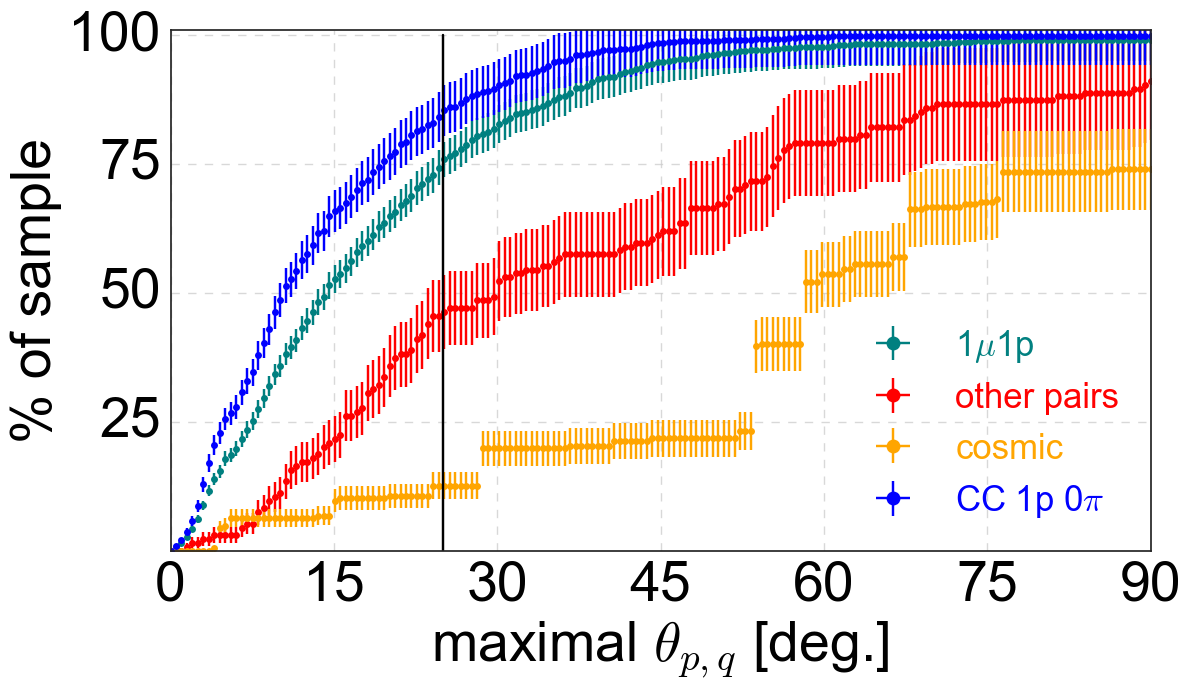

In [26]:
ax,leg=plot_cut_samples(reduced_cut_name='$|\Delta \phi - \pi|<40^{0}$',do_add_legend=True,legend_fontsize=25,legend_loc='lower right'                    
                 ,cut_var ='reco_theta_pq', cut_type= 'max',ticks_color='black'                 
                 ,x_label = 'maximal $\\theta_{p,q}$ [deg.]'
                 ,xmin=0, xmax=90 , Nbins=180,fontsize=40,figsize=(12,7));
ax.plot([25,25],[0,100],'-',color='black')
plt.savefig(figures_path+'theta_pq_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

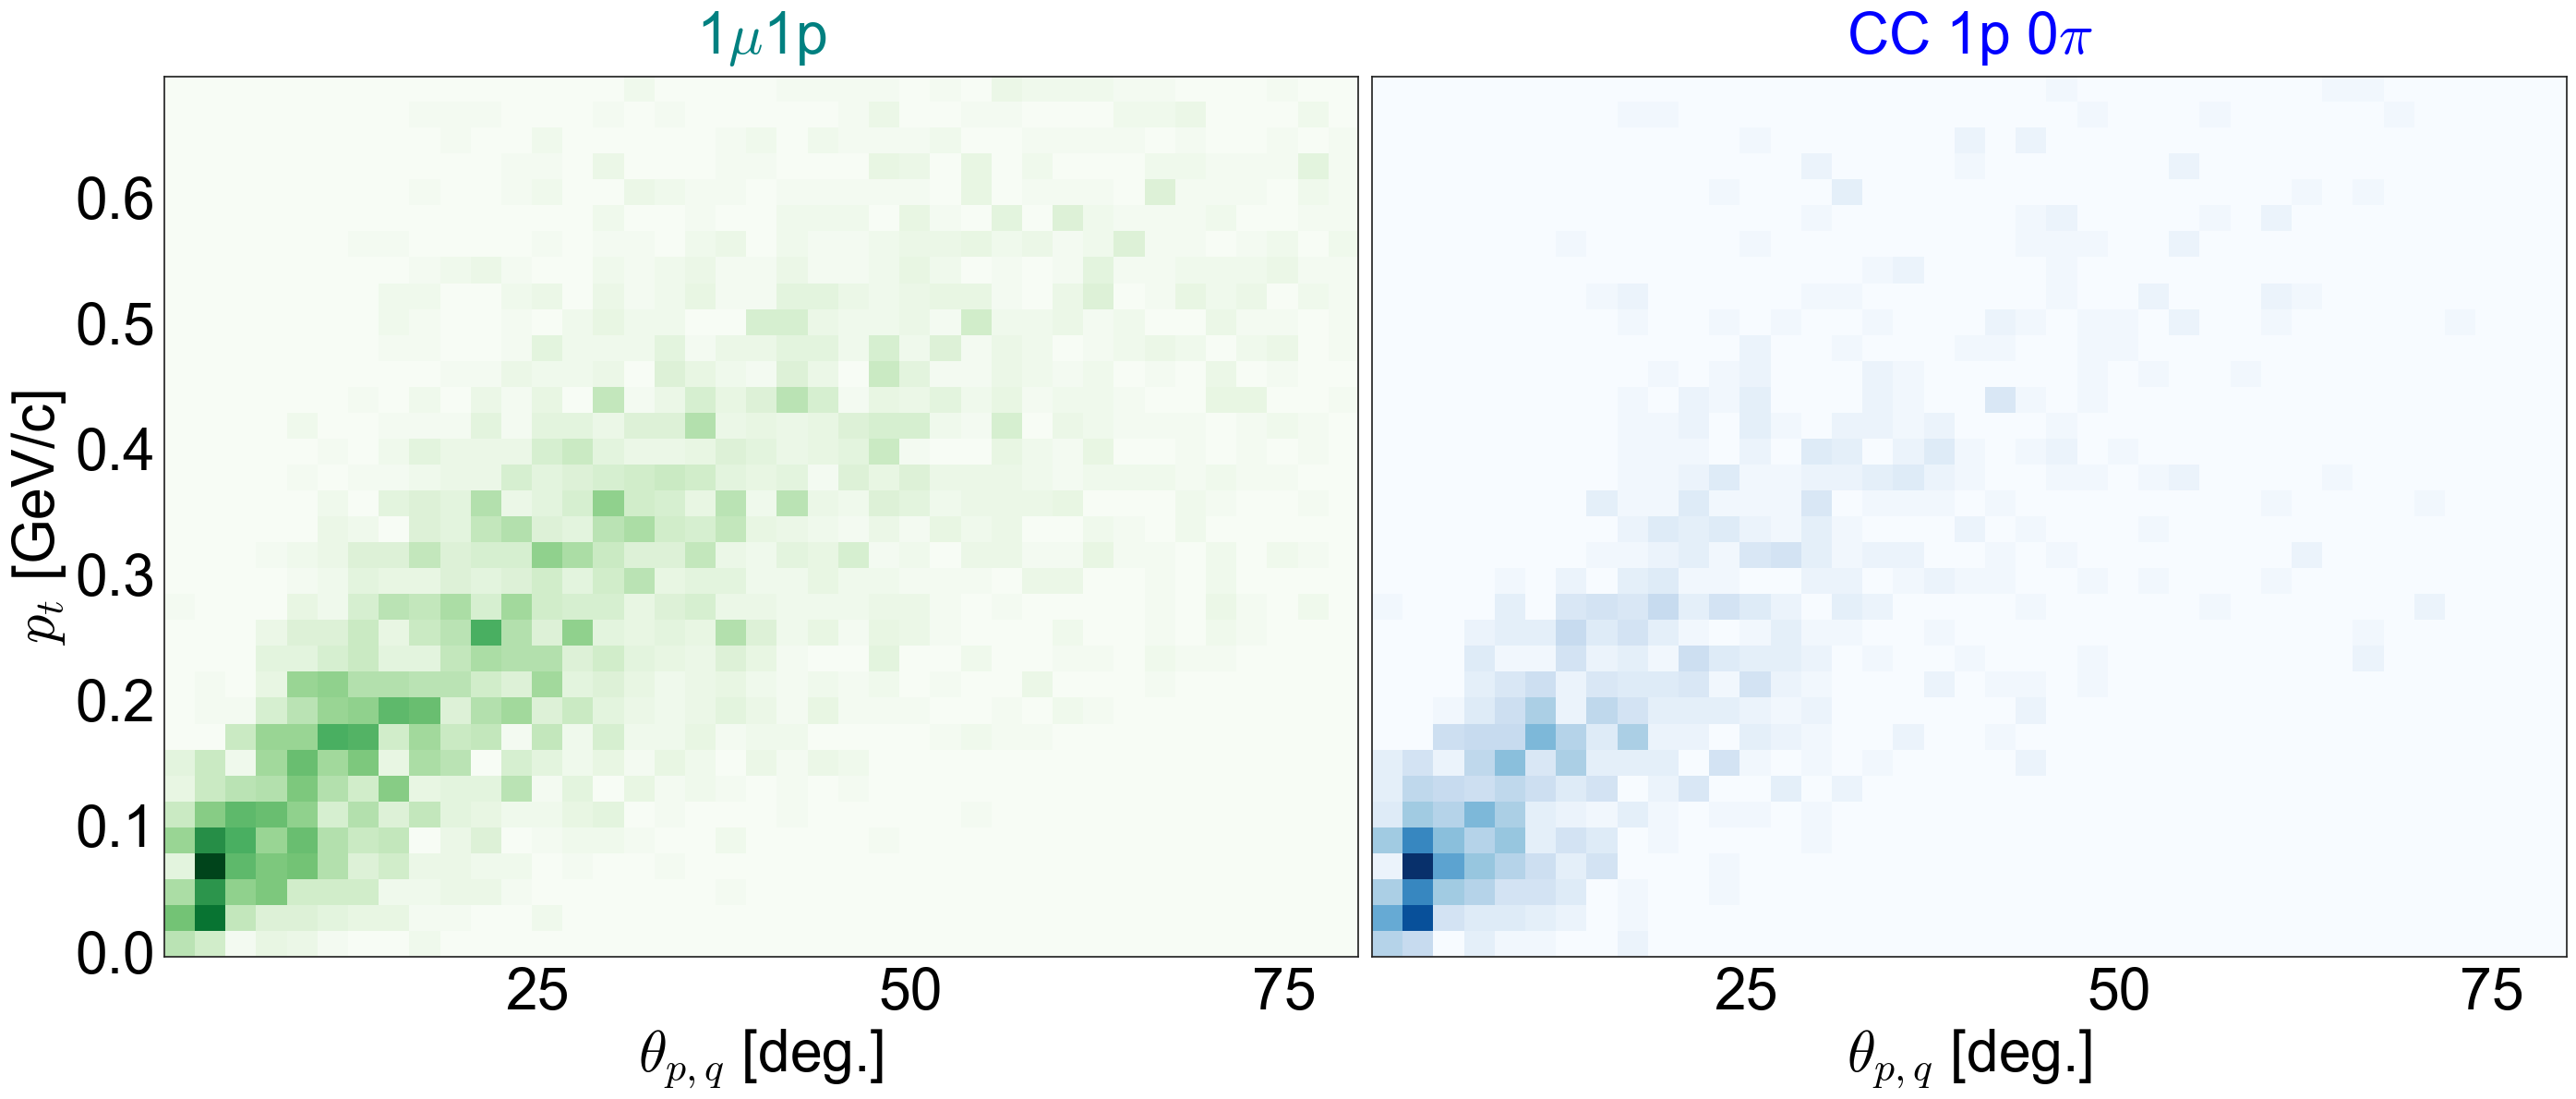

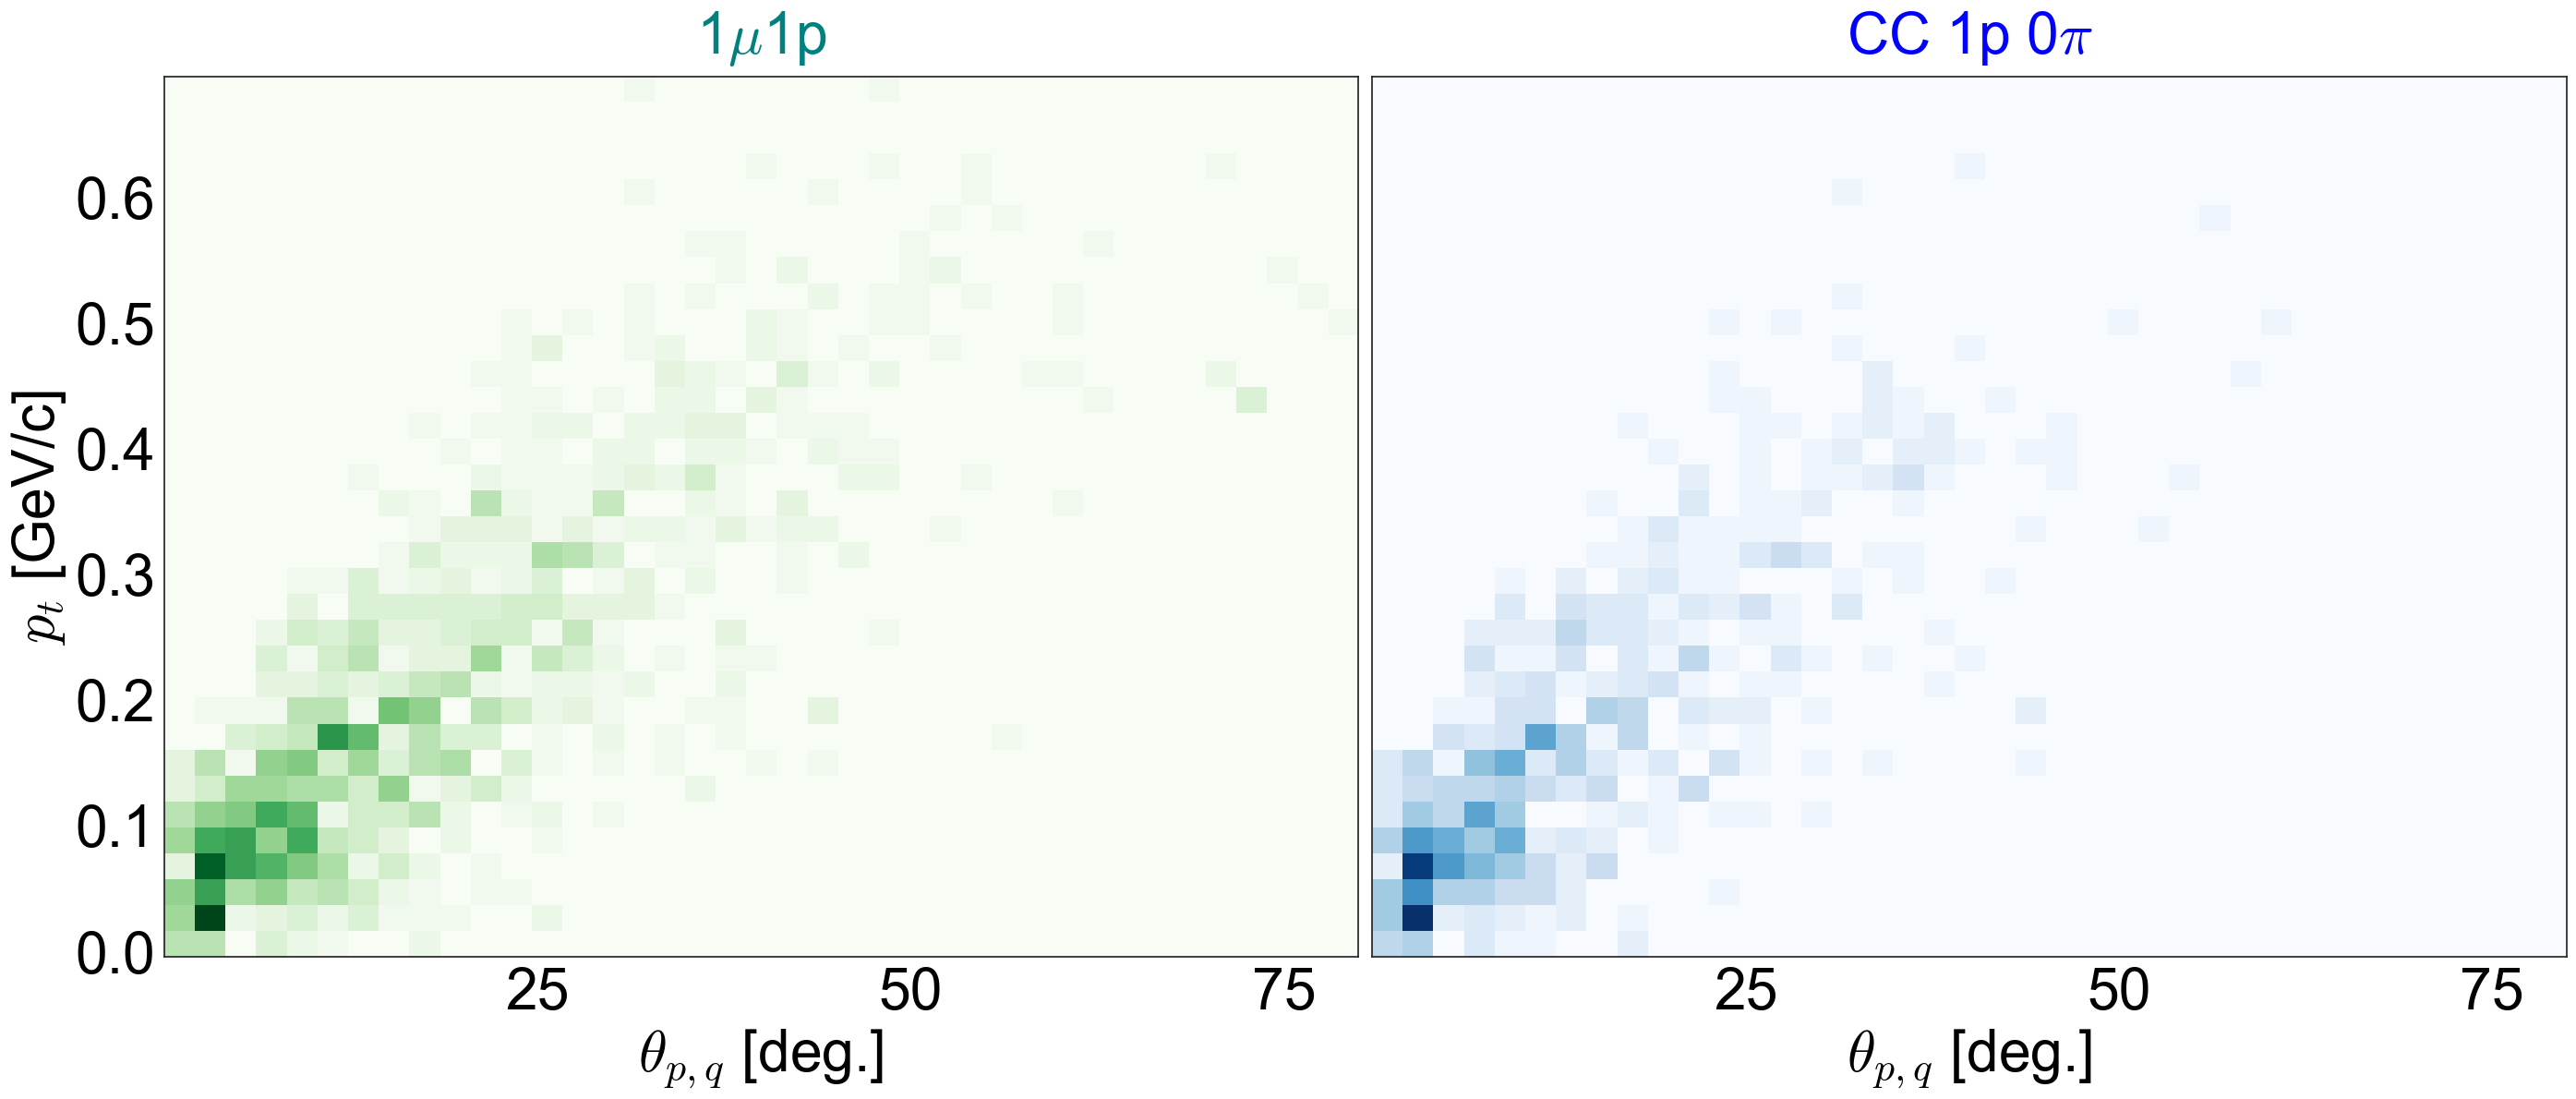

In [27]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,80,40),np.linspace(0,0.7,35))
x_label,y_label='$\\theta_{p,q}$ [deg.]','$p_{t}$ [GeV/c]'
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['reco_theta_pq'], 
                 sample['reco_Pt'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'theta_pq_vs_Pt.pdf')


fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,80,40),np.linspace(0,0.7,35))
x_label,y_label='$\\theta_{p,q}$ [deg.]','$p_{t}$ [GeV/c]'
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['$|\Delta \phi - \pi|<40^{0}$'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['reco_theta_pq'], 
                 sample['reco_Pt'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'theta_pq_vs_Pt_after_cut_DeltaPhi.pdf')